(C) 2025, Gerold Baier, University College London

In [42]:
from matplotlib.pyplot import subplots, figure, show

from numpy import around

from pandas import read_csv


# Networks with Python
## NetworkX

[__NetworkX__](https://networkx.org) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

To use NetworkX and visualise your networks, you can import the whole package.

## Create Graphs

NetworkX has built-in function to produce basic and classic graphs. 

### Complete Graph

A complete graph is a network where all nodes are connected to every other node. The complete graph is undirected. 


In [45]:
import networkx as nx


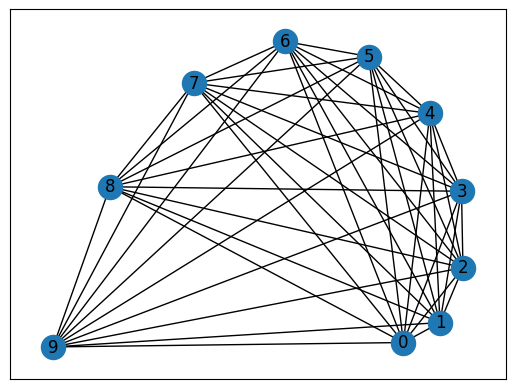

In [47]:

nodes = 10

G = nx.complete_graph(nodes)

layout = nx.spiral_layout(G)

nx.draw_networkx(G, pos=layout)

## Random graph

A random graph is a network where edges are added according to an edge probability to each node. The edge probability of the Erdos-Renyi graph is drawn from a normal distribution with a specified mean. 


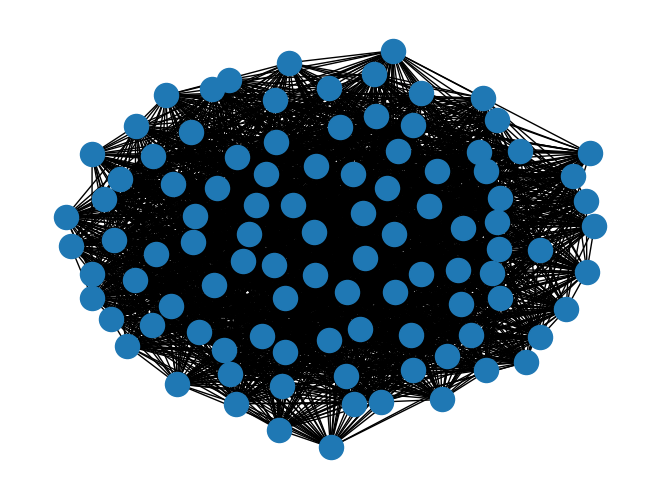

In [50]:
nodes = 100

edge_probab = .47

ER = nx.erdos_renyi_graph(nodes, edge_probab)

layout = nx.spring_layout(ER)

nx.draw(ER, layout)


_edge_probab_ controls the probability of assigning an edge. 

edge_probab = 0: no edge

edge_probab = 1: complete graph


## Directed Random Graph

In a directed graph, the directionality is indicated by an arrowhead on the edge. 


[0, 1, 2, 3, 4] 
 [(1, 3), (1, 4)]


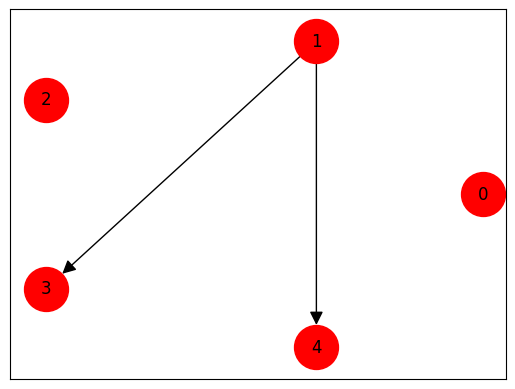

In [54]:
nodes = 5
edge_prob = 0.2

ER_dir = nx.erdos_renyi_graph(nodes, edge_prob, directed=True, seed=111)

layout = nx.circular_layout(ER_dir)

# nx.draw()
nx.draw_networkx(ER_dir, layout,
        node_size=1000,
        node_color='r',
        with_labels=True,
        arrowsize=20)


print(ER_dir.nodes, '\n', ER_dir.edges)


## Watts-Strogatz graph

Flexible network algorithm to build scale-free, small world, etc networks. 

Based on: Duncan J. Watts and Steven H. Strogatz, Collective dynamics of small-world networks, Nature, 393, pp. 440–442 (1998).

NetworkX documentation:
https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html


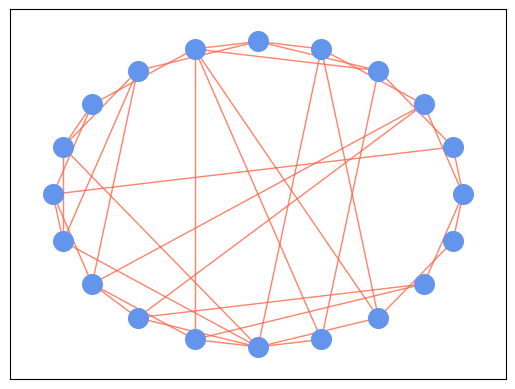

In [57]:
nodes = 20
neighbours = 4
alpha = 0.5

ws = nx.watts_strogatz_graph(nodes, neighbours, alpha, seed=111)

layout = nx.circular_layout(ws)

nx.draw_networkx_nodes(ws, pos=layout, alpha=1, node_size=200, node_color='cornflowerblue', node_shape='o')
nx.draw_networkx_edges(ws, pos=layout, alpha=.8, edge_color='tomato', width=1);


## Nodes and Edges information

In [60]:
print(ws.nodes)
print('')
print(ws.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

[(0, 1), (0, 19), (0, 2), (0, 18), (1, 3), (1, 10), (2, 4), (2, 12), (2, 13), (3, 5), (3, 6), (3, 16), (4, 5), (4, 15), (4, 17), (5, 6), (5, 7), (6, 8), (6, 14), (6, 17), (6, 16), (7, 9), (7, 12), (7, 11), (8, 9), (8, 10), (9, 11), (9, 15), (10, 11), (10, 12), (11, 15), (12, 13), (12, 14), (13, 15), (13, 18), (14, 15), (14, 18), (15, 16), (15, 17), (17, 19)]


# Network Quantification

## Degree

Each node within a graph has a number of edges connected to it and this number is referred to as the node (or vertex) **degree**. 

In directed graphs (or digraphs) the degree can be split into the **in degree** which counts the number of edges pointing *into* the node and **out degree** which counts the number of edges emanating *from* the node. 


In [64]:
node = 11

print('Degree of node', node, 'is', ws.degree[node])
print('')
ws.degree


Degree of node 11 is 4



DegreeView({0: 4, 1: 3, 2: 4, 3: 4, 4: 4, 5: 4, 6: 6, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 5, 13: 4, 14: 4, 15: 7, 16: 3, 17: 4, 18: 3, 19: 2})

## Degree distribution

It is straightforward to look at the degrees of a network with only a few nodes. However, for large networks with many nodes, the degree will be an array with as many numbers as there are nodes. This requires a more convenient way to summarise this information. An often used solution is to look at the _degree distribution_. 

The degree distribution is normally presented as a histogram showing how many times a given degree was found in that network.

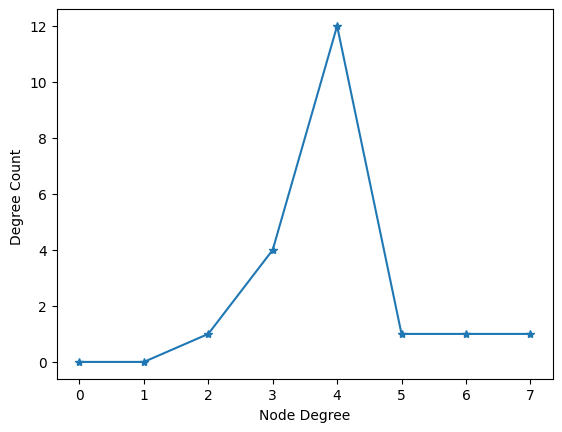

In [67]:
from matplotlib.pyplot import subplots, show

fig, ax = subplots()

ax.plot(nx.degree_histogram(ws), '-*');
ax.set_xlabel('Node Degree')
ax.set_ylabel('Degree Count ');

show()

In a __directed__ network the number of incoming connections is called the __in degree__ and the number of outgoing connections is called the __out degree__.

Thus, in an undirected network __in degree = out degree__.

Here is a more complex example:


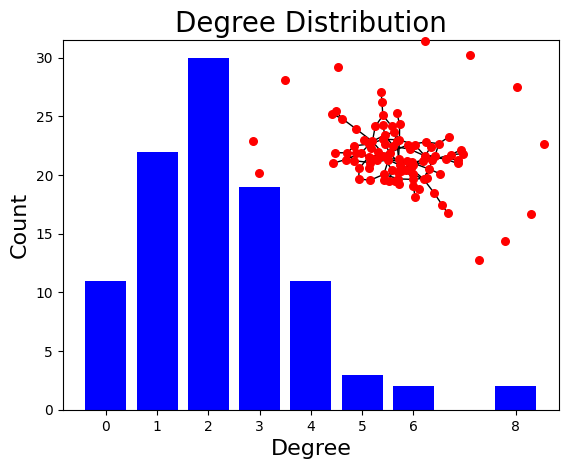

In [76]:
nodes  = 100
probab = 0.02

G = nx.gnp_random_graph(nodes, probab, seed=1)

import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = subplots()

ax.bar(deg, cnt, width=0.80, color="b")

title("Degree Distribution", fontsize=20)
ax.set_ylabel("Count", fontsize=16)
ax.set_xlabel("Degree", fontsize=16)
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg);

# draw graph in inset
axes([0.4, 0.4, 0.5, 0.5])

G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

pos = nx.spring_layout(G, seed=2)

axis("off")

nx.draw_networkx_nodes(G, pos, node_size=30, node_color='r')
nx.draw_networkx_edges(G, pos);

show()

This example plots the degree distribution, showing, for example, that 11 nodes in this network have no edges (degree = 0). You can verify that from the overlaid graph.

Note how the degree with highest probability (2) reflects the choice of edge probability of 2%.


## Clustering coefficients

As an example of a more complex quantitative measure, we will look at the clustering coefficient.  
Look at its formula below and consider extreme cases to understand what useful information the measure is supposed to convey. 

The clustering coefficient $C_i$ of node $i$ is calculated as:

$C_i = \frac{2\cdot n_i}{k\cdot(k-1)}$

where $n_i$ is the number of connections between nearest neighbors of node $i$; and $k$ is the number of nearest neighbors of node $i$.

The formula is derived as the number of edges between the neighbours divided by the maximally possible number of connections. The maximal number of possible connections of $k$ neighbours is $\frac{ k(k-1)}{2}$. There are $k\times k$ elements but if we leave out self-connections it becomes 
$k\times (k-1)$. As each edge is included twice (forward and backward) division by 2 gives the number of undirected connections.

This yields some important properties: if there is no connection between any of the neighbours, then $e=0$ and $C_u = 0$. If all neighbours are maximally connected (each node connected to every other node), then 
$e=\frac{ k(k-1)}{ 2 }$ and $C_u = 1$. 
The clustering coefficient therefore tells the extent to which neighbours of a node are connected among themselves. This definition is valid for undirected networks with no self-connections.

You can obtain the clustering coefficients in a Python dictionary using `clustering`. To extract the clustering coefficients from a graph as a Python list:

In [80]:
node = 0

print('CC of node', node, 'is', nx.clustering(ws, node))
print('')
cc_dict = nx.clustering(ws)

cc_list = [cc for cc in cc_dict.values()]

around(cc_list[:10], 2)

CC of node 0 is 0



array([0.  , 0.  , 0.17, 0.33, 0.17, 0.17, 0.13, 0.17, 0.  , 0.33])

And similar to the degree, for large networks, it can be meaningful to plot the distribution of clustering coefficients:

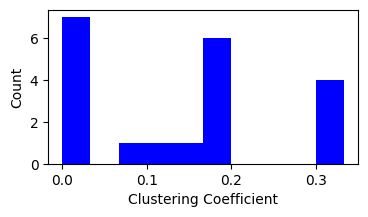

In [83]:
fig, ax = subplots(figsize=(4, 2))

ax.hist(list(nx.clustering(ws).values()), color='b');
ax.set_xlabel('Clustering Coefficient')
ax.set_ylabel('Count');

show()

Random and regular graphs have analytical distributions against which empirical distributions can be compared. 